In [202]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('titanic.csv')

In [60]:
df.head

<bound method NDFrame.head of      Pclass  Gender   Age     Fare  Survived
0         3    male  22.0   7.2500         0
1         1  female  38.0  71.2833         1
2         3  female  26.0   7.9250         1
3         1  female  35.0  53.1000         1
4         3    male  35.0   8.0500         0
..      ...     ...   ...      ...       ...
886       2    male  27.0  13.0000         0
887       1  female  19.0  30.0000         1
888       3  female   NaN  23.4500         0
889       1    male  26.0  30.0000         1
890       3    male  32.0   7.7500         0

[891 rows x 5 columns]>

In [7]:
df_new = df.drop(["PassengerId", "Name", "SibSp", "Parch", "Cabin", "Embarked", "Ticket"], axis=1)

In [8]:
df_new.head()

,Pclass,Gender,Age,Fare,Survived
0,3,male,22.0,7.2500,0
1,1,female,38.0,71.2833,1
2,3,female,26.0,7.9250,1
3,1,female,35.0,53.1000,1
4,3,male,35.0,8.0500,0


In [14]:
#Meanings

df=df_new

In [15]:
survived = df_new[df_new["Survived"]== 1]

In [17]:
len(survived)

342

<AxesSubplot: xlabel='Gender', ylabel='count'>

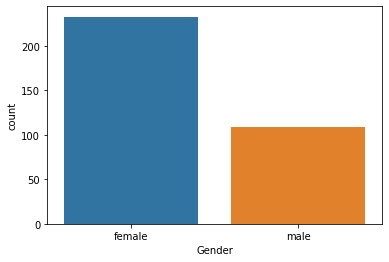

In [24]:
sb.countplot(survived, x="Gender")

<AxesSubplot: xlabel='Age', ylabel='count'>

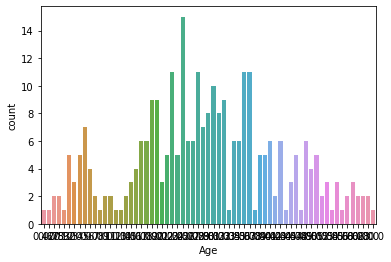

In [25]:
sb.countplot(survived, x="Age")

In [73]:
df.groupby(["Gender"]).mean()

,Pclass,Age,Fare,Survived
Gender,,,,
female,2.159236,27.915709,44.479818,0.742038
male,2.389948,30.726645,25.523893,0.188908


In [91]:
df_new = df.drop(["Age", "Fare"], axis=1)

In [114]:
surv_data= pd.pivot_table(df_new, values=["Survived"], index="Gender", columns = ["Pclass"], aggfunc= aggfunc=lambda x: x.sum())

SyntaxError: invalid syntax (Temp/ipykernel_7836/4012937803.py, line 1)

<AxesSubplot: ylabel='Gender'>

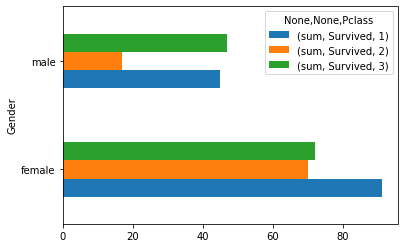

In [110]:
surv_data.plot.barh()

sum        
       Survived        
Pclass        1   2   3
Gender                 
female       91  70  72
male         45  17  47

In [115]:
df_age = df.drop(["Fare"], axis=1)

In [133]:
disct_age= pd.cut(df["Age"], bins= 5, labels = [0, 1, 2, 3, 4])

In [136]:
df_age["age"] = disct_age

In [165]:
surv_data= df_age.groupby(["Pclass", "Age", "Gender"])["Survived"].sum()

In [164]:
print(surv_data)

Pclass  Age    Gender
1       0.92   male      1.0
        2.00   female    0.0
        4.00   male      1.0
        11.00  male      1.0
        14.00  female    1.0
                        ... 
3       61.00  male      0.0
        63.00  female    1.0
        65.00  male      0.0
        70.50  male      0.0
        74.00  male      0.0
Name: Survived, Length: 283, dtype: float64


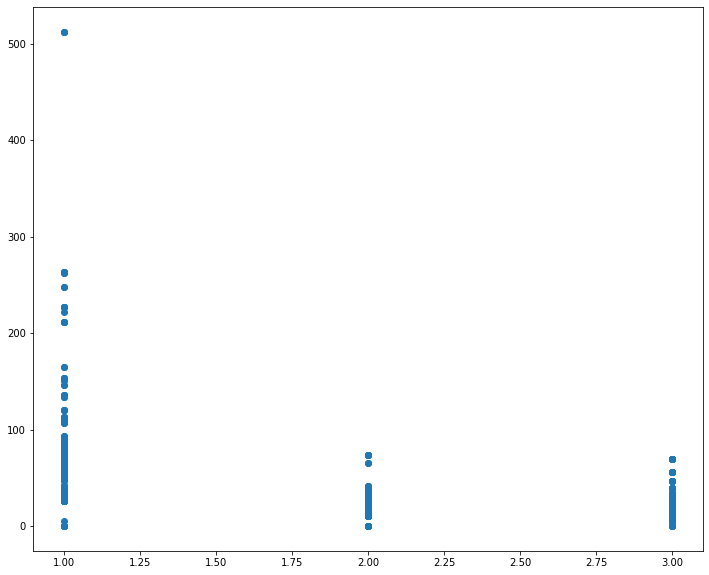

In [171]:
plt.figure(figsize =(12,10))
plt.scatter(df["Pclass"], df["Fare"])

In [173]:
df["Pclass"]

,Pclass,Gender,Age,Fare,Survived
179,3,male,36.0,0.0,0
263,1,male,40.0,0.0,0
271,3,male,25.0,0.0,1
277,2,male,NaN,0.0,0
302,3,male,19.0,0.0,0
413,2,male,NaN,0.0,0
466,2,male,NaN,0.0,0
481,2,male,NaN,0.0,0
597,3,male,49.0,0.0,0
633,1,male,NaN,0.0,0


In [214]:
df_class_drop = df.drop("Survived", axis=1)

In [213]:
df_class_drop.head()

,Pclass,Gender,Age,Fare
0,3,male,22.0,7.2500
1,1,female,38.0,71.2833
2,3,female,26.0,7.9250
3,1,female,35.0,53.1000
4,3,male,35.0,8.0500


In [216]:
df_class_drop = pd.get_dummies(df_class_drop)

In [217]:
df_class_drop

,Pclass,Age,Fare,Gender_female,Gender_male
0,3,22.0,7.2500,0,1
1,1,38.0,71.2833,1,0
2,3,26.0,7.9250,1,0
3,1,35.0,53.1000,1,0
4,3,35.0,8.0500,0,1
...,...,...,...,...,...
886,2,27.0,13.0000,0,1
887,1,19.0,30.0000,1,0
888,3,NaN,23.4500,1,0
889,1,26.0,30.0000,0,1


In [218]:
df_class_drop.describe()

,Pclass,Age,Fare,Gender_female,Gender_male
count,891.000000,714.000000,891.000000,891.000000,891.000000
mean,2.308642,29.699118,32.204208,0.352413,0.647587
std,0.836071,14.526497,49.693429,0.477990,0.477990
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,20.125000,7.910400,0.000000,0.000000
50%,3.000000,28.000000,14.454200,0.000000,1.000000
75%,3.000000,38.000000,31.000000,1.000000,1.000000
max,3.000000,80.000000,512.329200,1.000000,1.000000


In [219]:
age_mean= df_class_drop["Age"].mean()

In [220]:
df_class_drop["Age"].fillna(value= age_mean,  inplace=True)

,Age,Fare,Survived,Gender_female,Gender_male
0,22.000000,7.2500,0,0,1
1,38.000000,71.2833,1,1,0
2,26.000000,7.9250,1,1,0
3,35.000000,53.1000,1,1,0
4,35.000000,8.0500,0,0,1
5,29.699118,8.4583,0,0,1
6,54.000000,51.8625,0,0,1
7,2.000000,21.0750,0,0,1
8,27.000000,11.1333,1,1,0
9,14.000000,30.0708,1,1,0


In [222]:
cor = df_class_drop.corr()

<AxesSubplot: >

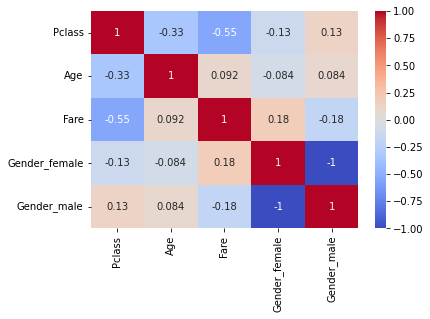

In [223]:
sns.heatmap(cor, cmap = "coolwarm", annot = True)

<AxesSubplot: xlabel='Age', ylabel='Count'>

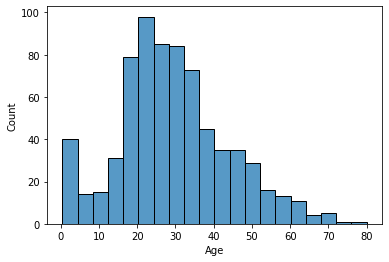

In [225]:
sns.histplot(df["Age"])

<AxesSubplot: xlabel='Fare', ylabel='Count'>

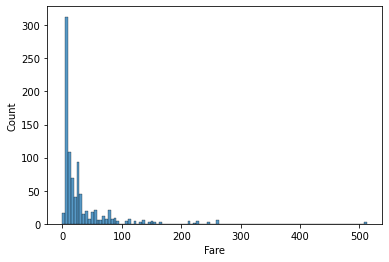

In [226]:
sns.histplot(df["Fare"])

In [227]:
from sklearn.neighbors import KernelDensity

In [231]:
kde = KernelDensity(kernel='gaussian', bandwidth=0.5).fit([df_class_drop["Age"],df_class_drop["Fare"] ])

KernelDensity(bandwidth=0.5)

<AxesSubplot: xlabel='Age', ylabel='Density'>

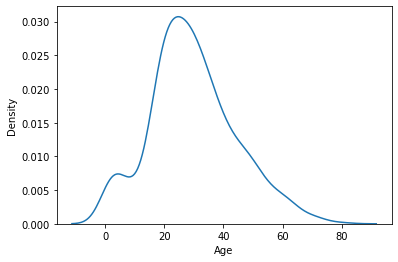

In [235]:
sns.kdeplot(df["Age"])

<AxesSubplot: xlabel='Fare', ylabel='Density'>

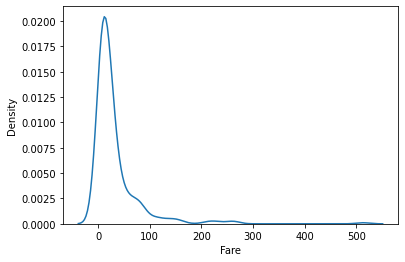

In [236]:
sns.kdeplot(df["Fare"])

C:\Users\amitr\AppData\Local\Temp/ipykernel_7836/2841448387.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Age"], hist=True, kde=True)


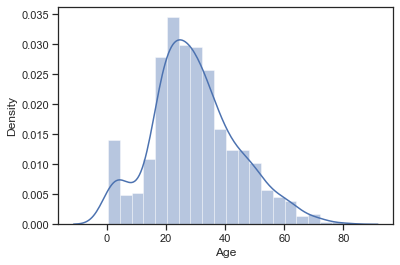

In [270]:

sns.set(style="ticks") 
sns.distplot(df["Age"], hist=True, kde=True)
plt.show()

C:\Users\amitr\AppData\Local\Temp/ipykernel_7836/3127711869.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Fare"], hist=True, kde=True)


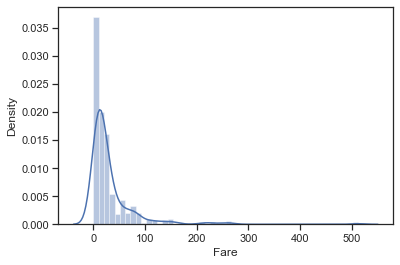

In [271]:
sns.set(style="ticks") 
sns.distplot(df["Fare"], hist=True, kde=True)
plt.show()

In [238]:
from sklearn.model_selection import train_test_split

In [240]:
 X_train, X_test, y_train, y_test = train_test_split(df_class_drop, df["Survived"], test_size=0.2, random_state=42)

In [241]:
X_train.shape

(712, 5)

In [242]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)


GaussianNB()

In [273]:
predictions = model.predict_proba(X_test[:10])

In [276]:
pred = model.predict(X_test[:10])

In [277]:
predictions, pred

(array([[0.9906724 , 0.0093276 ],
        [0.98005615, 0.01994385],
        [0.98884743, 0.01115257],
        [0.01399093, 0.98600907],
        [0.04536928, 0.95463072],
        [0.00186328, 0.99813672],
        [0.06140727, 0.93859273],
        [0.98779422, 0.01220578],
        [0.04757714, 0.95242286],
        [0.00698675, 0.99301325]]),
 array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1], dtype=int64))

C:\Users\amitr\AppData\Local\Temp/ipykernel_7836/2588316582.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  y_test[:10]


709    1
439    0
840    0
720    1
39     1
290    1
300    1
333    0
208    1
136    1
Name: Survived, dtype: int64

In [254]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [255]:
report = classification_report(y_test,model.predict(X_test) )

In [256]:
print(report)

              precision    recall  f1-score   support

           0       0.80      0.82      0.81       105
           1       0.74      0.72      0.73        74

    accuracy                           0.78       179
   macro avg       0.77      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179



In [257]:
matrix = confusion_matrix(y_test,model.predict(X_test))

array([[86, 19],
       [21, 53]], dtype=int64)

<AxesSubplot: >

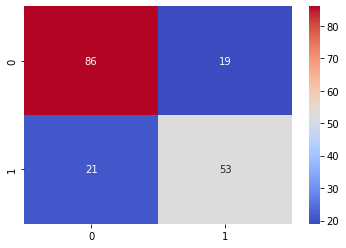

In [268]:
sns.heatmap(matrix, cmap = 'coolwarm', annot=True)

In [279]:
from sklearn.naive_bayes import CategoricalNB

In [283]:
#catgories 
categories = pd.cut(df['age'], bins=[18,30,45, 60, 80]) 

,Pclass,Age,Fare,Gender_female,Gender_male
331,1,45.500000,28.5000,0,1
733,2,23.000000,13.0000,0,1
382,3,32.000000,7.9250,0,1
704,3,26.000000,7.8542,0,1
813,3,6.000000,31.2750,1,0
...,...,...,...,...,...
106,3,21.000000,7.6500,1,0
270,1,29.699118,31.0000,0,1
860,3,41.000000,14.1083,0,1
435,1,14.000000,120.0000,1,0


In [280]:
model2 = CategoricalNB()
model2.fit(X_train, y_train)

CategoricalNB()

In [281]:
pred = model.predict(X_test[:10])

In [282]:
pred

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1], dtype=int64)

In [ ]:
#hybird catgorical naive 
# make dataset by combining.
hybrid naive bayes